# Building A Handwritten Digits Classifier

In this project, we use some different deep neural networks to classify a handwritten digits date set from UCI. One can also discover the limitation of traditional machine learning models for image classification.

First of all, we import necessary libraries and then load the digits data set.

In [1]:
from sklearn.datasets import load_digits 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


digits=load_digits(n_class=10, return_X_y=True)
print(digits)
print(type(digits))
features=pd.DataFrame(digits[0])
print(features)
labels=pd.Series(digits[1])
print(labels)


(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), array([0, 1, 2, ..., 8, 9, 8]))
<class 'tuple'>
       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.

Let us visualize an example of a digit image in this data set. Note that each image is represented as a row of 64 pixel values. In order to visualize the image from the data frame, one need to reshape these pixel values back to the 8x8 dimension and then plot them.

0      0.0
1      0.0
2      5.0
3     13.0
4      9.0
      ... 
59    13.0
60    10.0
61     0.0
62     0.0
63     0.0
Name: 0, Length: 64, dtype: float64
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


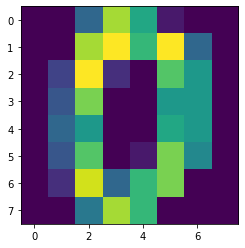

In [2]:
first_image = features.iloc[0]
print(first_image)
np_image = first_image.values
np_image = np_image.reshape(8,8)
print(np_image)
plt.imshow(np_image)

So the first image in the data set looks like the digit 0. Now let us visualize several images at the same time.

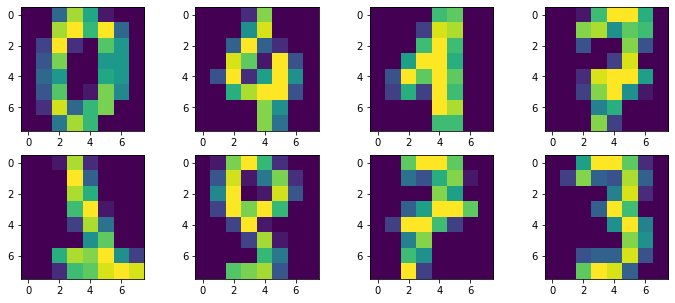

In [3]:
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(2,4,1)
ax2=fig.add_subplot(2,4,2)
ax3=fig.add_subplot(2,4,3)
ax4=fig.add_subplot(2,4,4)
ax5=fig.add_subplot(2,4,5)
ax6=fig.add_subplot(2,4,6)
ax7=fig.add_subplot(2,4,7)
ax8=fig.add_subplot(2,4,8)

image_1 = features.iloc[0].values.reshape(8,8)
ax1.imshow(image_1)
image_2 = features.iloc[100].values.reshape(8,8)
ax2.imshow(image_2)
image_3 = features.iloc[200].values.reshape(8,8)
ax3.imshow(image_3)
image_4 = features.iloc[300].values.reshape(8,8)
ax4.imshow(image_4)
image_5 = features.iloc[1000].values.reshape(8,8)
ax5.imshow(image_5)
image_6 = features.iloc[1100].values.reshape(8,8)
ax6.imshow(image_6)
image_7 = features.iloc[1200].values.reshape(8,8)
ax7.imshow(image_7)
image_8 = features.iloc[1300].values.reshape(8,8)
ax8.imshow(image_8)
plt.show()

# K-Nearest Neighbors Models

Before exploring deep neural networks, let us use the traditional machine learning algorithm k-nearest neighbors to classify the images. Here we use cross validation with different number of folds and compute the accuracy to get a better understanding.

k=2 0.9521443028755039
k=3 0.9616026711185309
k=4 0.9621665429349171
k=5 0.9643933766635715
k=6 0.9688405797101449
k=7 0.9638319031406336
k=8 0.9649627976190476
k=9 0.9705192629815745
k=10 0.9738485412787089
k=11 0.9710799450437338


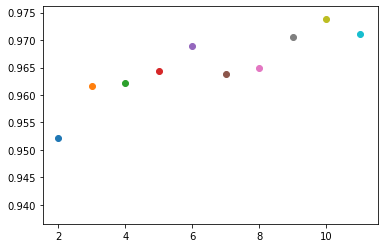

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# number of folds has to be at least 2
for k in range(2,12):
    kf = KFold(k, shuffle=False, random_state=None)
    knc=KNeighborsClassifier()
    accuracies = cross_val_score(knc, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracies)
    print('k={}'.format(k),avg_accuracy)
    plt.scatter(k, avg_accuracy)    



The accuracies are very good. But these models do have some limitation. First of all, it requires high memory usage (for each new unseen observation, many comparisons need to be made to seen observations). The second, there is no model representation to debug and explore.

In the following, we will use deep neural networks to explore the problem. Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

Note the case k=4 with the accuracy of 96.21% in the above k-nearest neighbors algorithm in comparing with deep neural networks models below.


# Single Hidden Layer Neural Networks

First of all, we can start with a neural network with a single hidden layer with different number of neurons. 

C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8881440237564959


C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.917623113090819


C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.9309972779015095
0.9371133382826033
0.9443466963622865
0.9499084385053205
0.9582603316010889
0.9593739173471914
0.9593751546646869


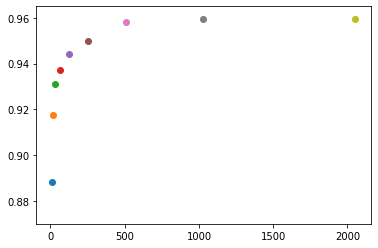

In [5]:
from sklearn.neural_network import MLPClassifier

for k in range(3,12):
    kf = KFold(4, shuffle=False, random_state=None)
    mlp=MLPClassifier(hidden_layer_sizes = (2**k,))
    accuracies = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracies)
    print(avg_accuracy)
    plt.scatter(2**k, avg_accuracy)    
    

As we can see, adding more neurons to the single hidden layer massively improves the accuracy, from 88% to almost 96%. 

Remember in the above that k-nearest neighbors achieved 96,21% accuracy, there doesn't seem to be any advantage to using a single hidden layer neural network. We now move to neural networks with two hidden layers.

# Two Hidden Layers Neural Networks

C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8535993565949023


C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9059502598366741
0.9343330858698342
0.932099727790151
0.9543664934422174
0.9521430339024993
0.9615998515219005
0.9621541697599605
0.9632689928235585


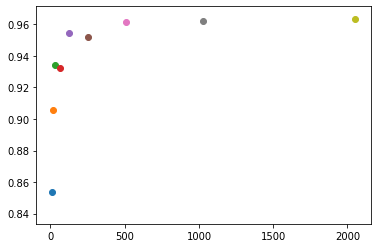

In [6]:
for k in range(3,12):
    kf = KFold(4, shuffle=False, random_state=None)
    mlp=MLPClassifier(hidden_layer_sizes = (2**k,2**k))
    accuracies = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracies)
    print(avg_accuracy)
    plt.scatter(2**k, avg_accuracy)    

The accuracy has been improved to 96.32%, which is better than k-nearest neighbors model. This seems to be a very good sign.

Let us continue to neural networks with three hidden layers.

# Three Hidden Layers Neural Networks

C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8491759465478842


C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.923199703043801
0.9321083890126205
0.929887404107894
0.953809700569166
0.9604875030932937
0.9593726800296957
0.9638233110616184
0.961044295966345


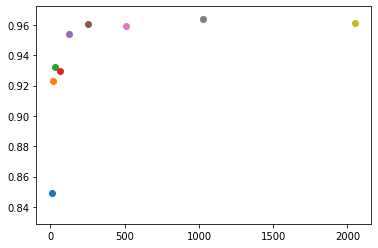

In [7]:
for k in range(3,12):
    kf = KFold(4, shuffle=False, random_state=None)
    mlp=MLPClassifier(hidden_layer_sizes = (2**k,2**k,2**k))
    accuracies = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracies)
    print(avg_accuracy)
    plt.scatter(2**k, avg_accuracy)    

The accuracy has been improved to 96.38%. So having more layers and more neurons seems to improve the network's performance. 

In the final step, let us confirm this by exploring the case of cross validation with 6-folds. Note that the accuracy of the k-nearest neighborgs model for k=6 was 96.88%.

C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8775826830174656


C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\46704\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9287774061687105
0.9426885916016351
0.9415830546265328
0.9605016722408027
0.951588628762542
0.9610535117056856
0.9627183203270161
0.9643831289483463


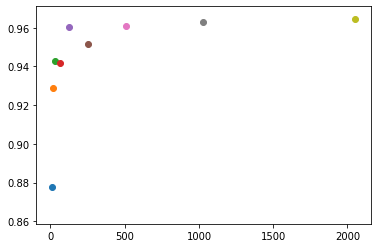

In [10]:
for k in range(3,12):
    kf = KFold(6, shuffle=False, random_state=None)
    mlp=MLPClassifier(hidden_layer_sizes = (2**k,2**k,2**k))
    accuracies = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracies)
    print(avg_accuracy)
    plt.scatter(2**k, avg_accuracy)  

The accuracy has been improved to 96.44% if we use 2^11=2048 neurons.

Let us visualize some image outputs of this deep neural networks model with three hidden layers and 128 neurons in each layer.

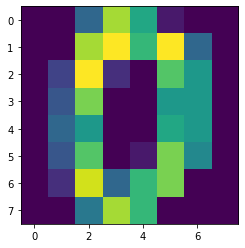

Prediction: 0


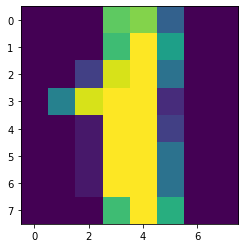

Prediction: 1


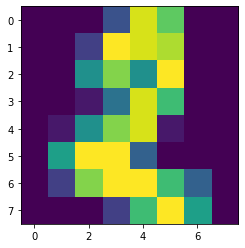

Prediction: 8


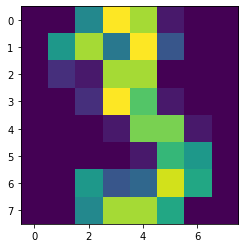

Prediction: 3


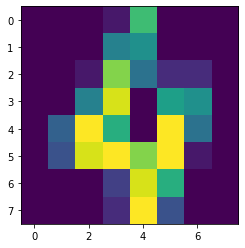

Prediction: 4


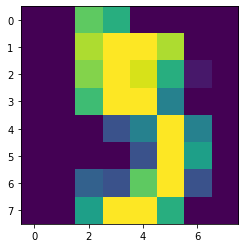

Prediction: 9


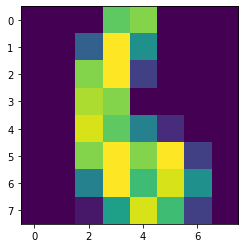

Prediction: 6


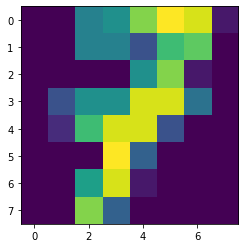

Prediction: 7


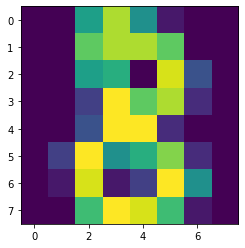

Prediction: 8


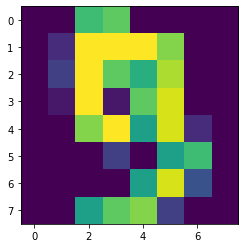

Prediction: 9


In [14]:
from sklearn.model_selection import cross_val_predict

kf = KFold(6, shuffle=False, random_state=None)
model=MLPClassifier(hidden_layer_sizes = (128,128,128))
predictions = cross_val_predict(model, features, labels, cv=kf)

test_features=features.values
test_images=test_features[:10]
for i in range(10):
    image_reshape=test_images[i].reshape(8,8)
    plt.figure()
    plt.imshow(image_reshape)
    plt.show()
    print('Prediction:', predictions[i])


This model works quite well except for only one wrong prediction at the 3rd image. The correct prediction should be 2 instead of 8. Let us increase the number of neurons in each layer to 2048.

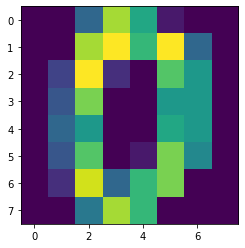

Prediction: 0


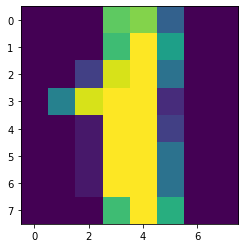

Prediction: 1


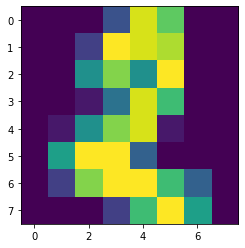

Prediction: 2


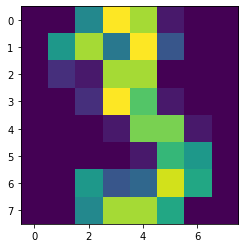

Prediction: 3


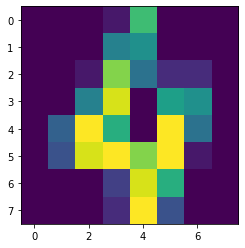

Prediction: 4


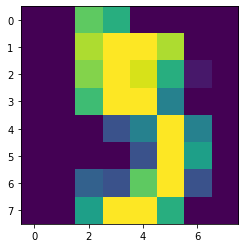

Prediction: 9


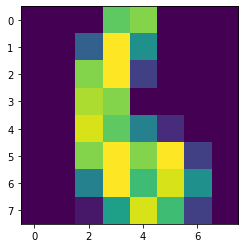

Prediction: 6


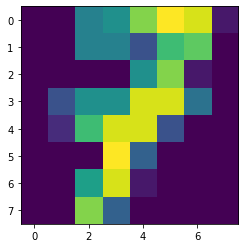

Prediction: 7


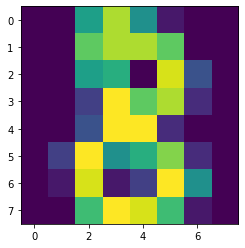

Prediction: 8


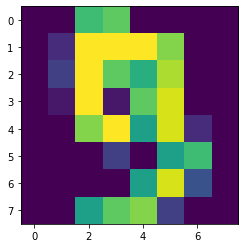

Prediction: 9


In [15]:
kf = KFold(6, shuffle=False, random_state=None)
model=MLPClassifier(hidden_layer_sizes = (2048,2048,2048))
predictions = cross_val_predict(model, features, labels, cv=kf)

test_features=features.values
test_images=test_features[:10]
for i in range(10):
    image_reshape=test_images[i].reshape(8,8)
    plt.figure()
    plt.imshow(image_reshape)
    plt.show()
    print('Prediction:', predictions[i])

Now all the predictions are correct!

# Conclusion

In this projects, we build handwritten digits classifiers with deep neural networks. We observe that having more layers and more neurons seems to improve the models' accuracy.